# Inspect published vagal ganglia scRNA-seq from Prescott et al. (2020)

## 0. Imports

In [1]:
library(Seurat)
library(Signac)
library(GenomicFeatures)
library(EnsDb.Mmusculus.v79)
library(Rsamtools)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following obj

## 1. Paths

In [2]:
master_data_dir = '/bap/bap/collab_asthma_multiome/'

## 2. Load object

In [3]:
load(file.path(master_data_dir, 'AggregatedData_190717_v2.RData'))

In [4]:
ls()

[1] "aggregate.combined" "aggregate.markers"  "master_data_dir"

In [5]:
aggregate.combined <- UpdateSeuratObject(aggregate.combined)
aggregate.combined


Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc 'pca'

Updating matrix keys for DimReduc 'umap'

Updating matrix keys for DimReduc 'tsne'

Warning message:
"Assay RNA changing from Assay to Assay"
Warning message:
"Assay integrated changing from Assay to Assay"
Warning message:
"Graph integrated_nn changing from Graph to Graph"
Warning message:
"Graph integrated_snn changing from Graph to Graph"
Warning message:
"DimReduc pca changing from DimReduc to DimReduc"
Warning message:
"DimReduc umap changing from DimReduc to DimReduc"
Warning message:
"DimReduc tsne changing from DimReduc to DimReduc"
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in integrated

Updating slots in integrated_nn

Setting default assay of integrated_nn to integrated

Updating slots in integrated_snn

Setting default assay of integrated_snn to i

An object of class Seurat 
21940 features across 25117 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

## 3. Inspect object attributes

In [6]:
head(aggregate.combined@meta.data)
print(dim(aggregate.combined@meta.data))

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.1,seurat_clusters,RNA_snn_res.2,stim,integrated_snn_res.1,integrated_snn_res.1.5
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<fct>,<fct>
CCCTTAGTCCTACCGT_1,Vagal10X,6149,2658,5.529354,6,3,2,WT,0,3
CCTAACCCAACTACGT_1,Vagal10X,2321,1481,5.385610,6,3,5,WT,0,3
CGCCAGACAGCAGGAT_1,Vagal10X,1747,1102,8.414425,6,3,5,WT,0,3
GTAGGTTTCACAGTGT_1,Vagal10X,1711,1116,5.260082,6,3,0,WT,0,3
TGATTCTTCGCTGTTC_1,Vagal10X,2420,1397,5.495868,6,3,5,WT,0,3
AAACCCACATCGGATT_1,Vagal10X,4766,2482,6.357533,8,2,0,WT,0,2


[1] 25117    10


In [7]:
head(Idents(aggregate.combined))

CCCTTAGTCCTACCGT_1 CCTAACCCAACTACGT_1 CGCCAGACAGCAGGAT_1 GTAGGTTTCACAGTGT_1 
               NG3                NG3                NG3                NG3 
TGATTCTTCGCTGTTC_1 AAACCCACATCGGATT_1 
               NG3                NG2 
37 Levels: JG1 NG1 NG2 NG3 NG4 NG5 NG6 NG7 NG8 NG9 JG2 NG10 NG11 NG12 ... NG27

In [8]:
aggregate.combined$renamed_clusters <-Idents(aggregate.combined)

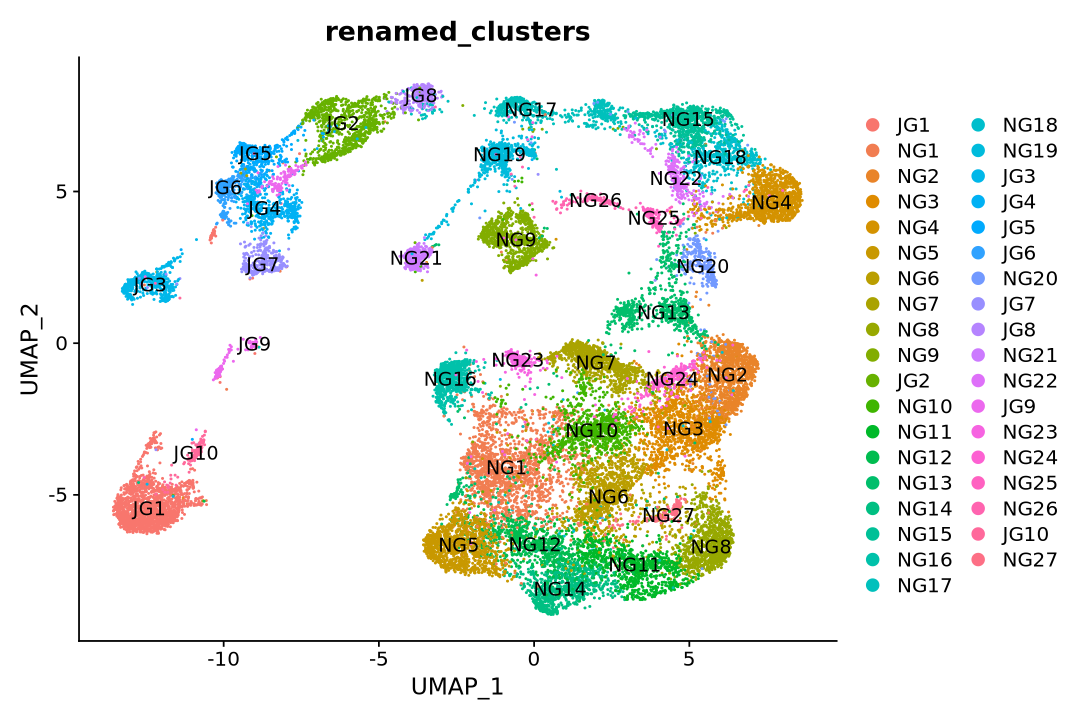

In [9]:
options(repr.plot.width=9, repr.plot.height=6)

vagal_umap <- DimPlot(aggregate.combined, group.by = "renamed_clusters",reduction = "umap", label = T)

vagal_umap

### 3.1 Check ```P2ry1``` expression

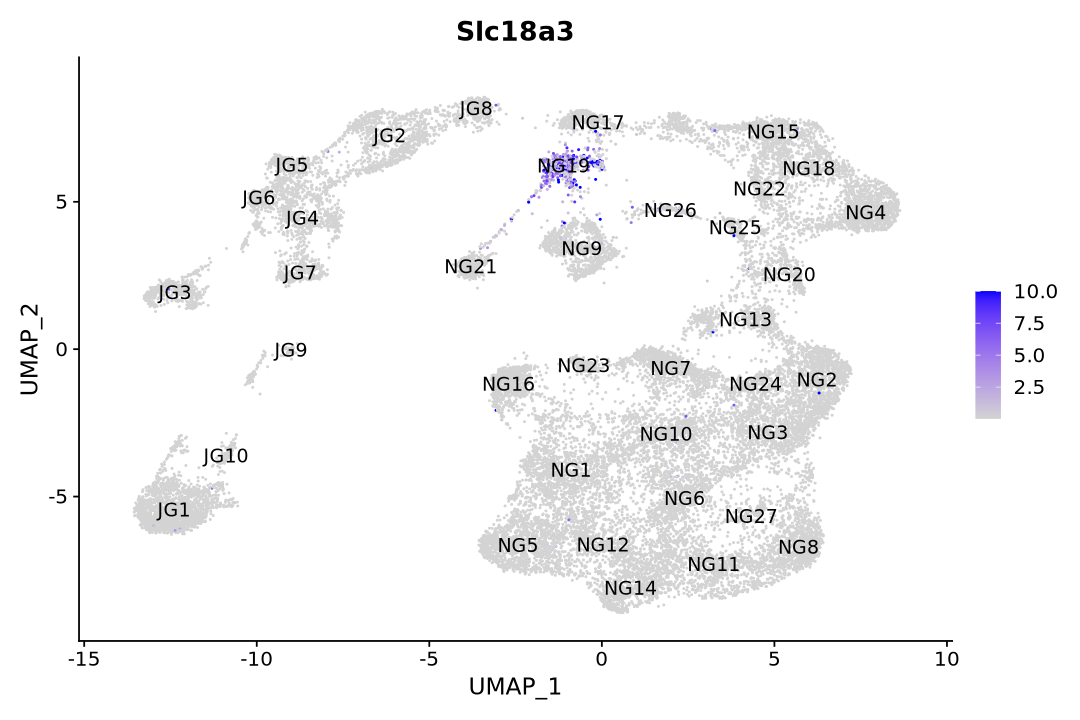

In [10]:
options(repr.plot.width=9, repr.plot.height=6)

FeaturePlot(aggregate.combined, features = "Slc18a3", slot = 'scale.data', min.cutoff = 'q10', max.cutoff = 'q95', reduction = "umap", label = T)

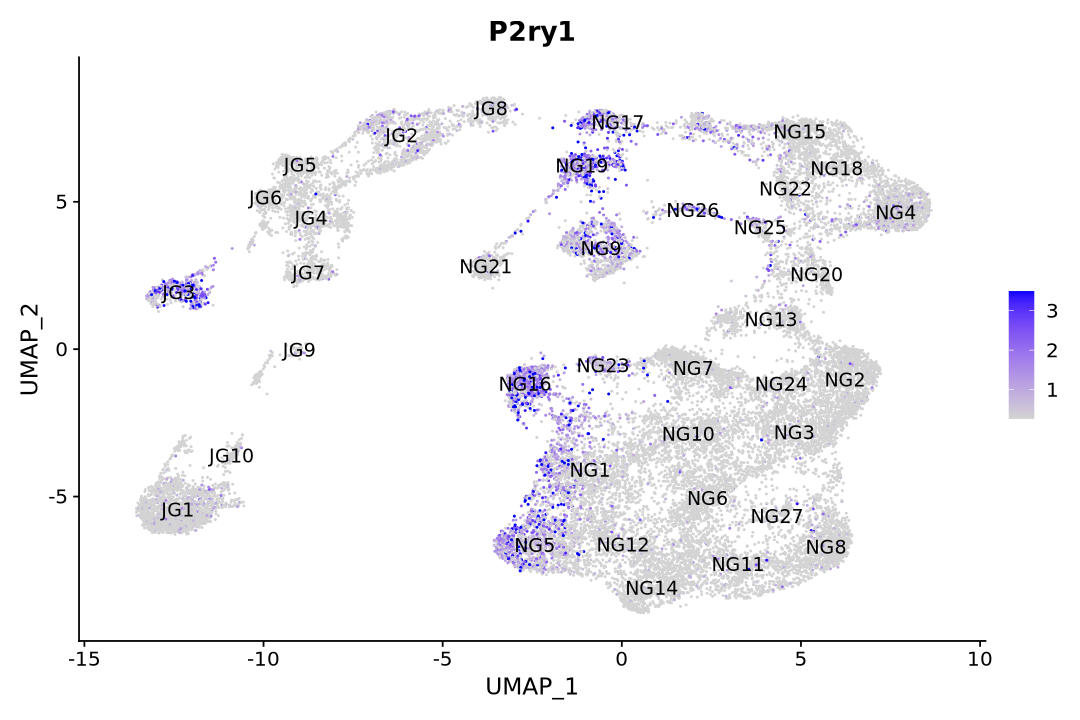

In [11]:
options(repr.plot.width=9, repr.plot.height=6)

FeaturePlot(aggregate.combined, features = "P2ry1", slot = 'scale.data', min.cutoff = 'q10', max.cutoff = 'q95', reduction = "umap", label = T)

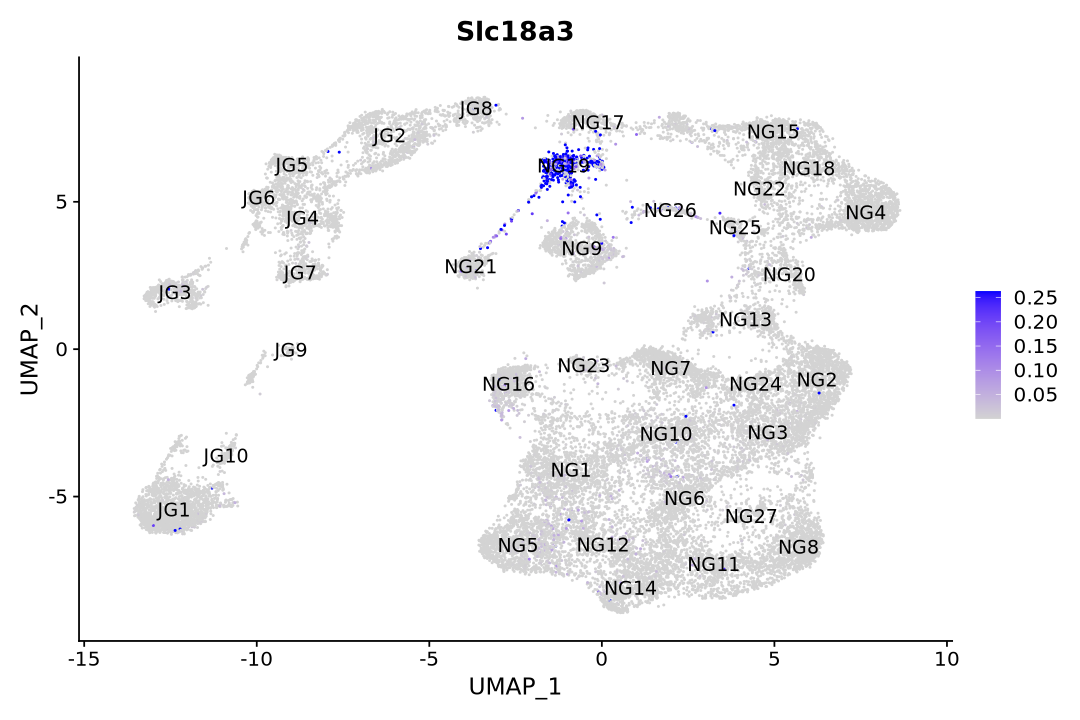

In [12]:
options(repr.plot.width=9, repr.plot.height=6)

FeaturePlot(aggregate.combined, features = "Slc18a3", slot = 'data', min.cutoff = 'q10', max.cutoff = 'q95', reduction = "umap", label = T)

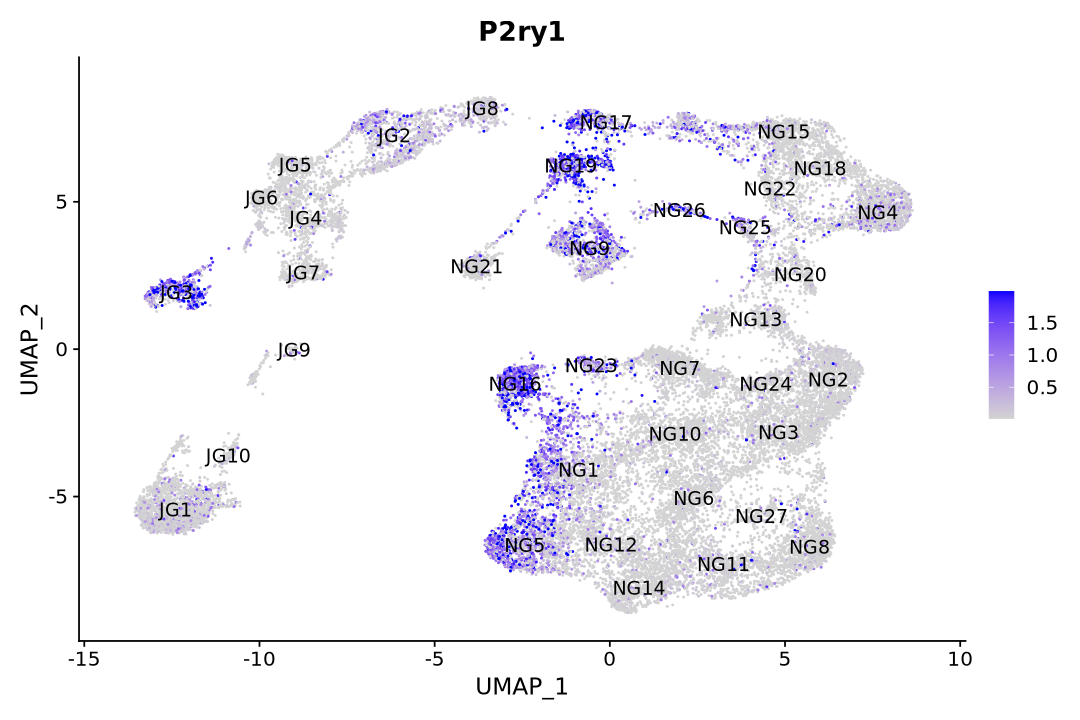

In [13]:
options(repr.plot.width=9, repr.plot.height=6)

FeaturePlot(aggregate.combined, features = "P2ry1", slot = 'data', min.cutoff = 'q10', max.cutoff = 'q95', reduction = "umap", label = T)

# END